

# Interactive Lecture Material Using Open Source Technologies
<br> 

### Prabhas K. Yadav




A lecture material aka a slide contains:

1. Texts
2. Figures
3. Mathematical expressions (symbols and their combinations)

  


Among the above three points the interactiveness is easily possible for _mathematical expressions_.

_Figures_, when not based on mathematical expression, are combination of different geometries and therefore, they can be mathematically expressed. But combining many geometries can be very time-consuming. 

_Texts_ are mostly emphasized.

### How to make mathematical expression interactive?

A mathematical expression is composed of symbols organized in some mathematical order. 

The initial mathematical order is further reordered based on mathematical operations.

A mathematical derivation is a sequence of mathematical operations.




#### A case of Energy depth plot used in Hydraulics

Let us learn Specific Energy $E$ and Depth $y$ relation that is fundamental in hydraulics of open channel flow,
i.e. the ($E-y$) plot.  We further find _critical depth_ $y_c$ and the corresponding _critical energy_ ($E_c$).
The **fundamental equation** is: $$ E = y + \frac{q^2}{2gy^2}$$

Where,
$q$ [L$^2$/T] is discharge per unit width $b$ [L] of Channel  and $g$ = accleration due to gravity [L/T$^2$]

In [6]:
import sympy as sp 
from sympy.plotting import *
sp.init_printing(use_latex='mathjax')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%precision %.3f 

'%.3f'

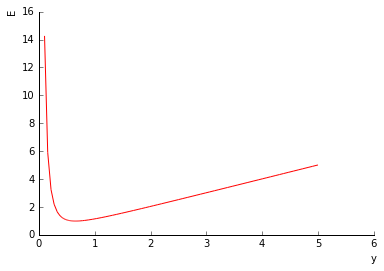

In [5]:
Q = 5 # Discharge 
g = 9.81 
b = 3# width of the channel
q = Q/b 
y=sp.symbols('y')
p1=plot_parametric(y, y+(q**2/(2*g*y**2)), (y, 0.1, 5), xlabel='y',ylabel='E', line_color="red") 

In the open channel flow, $y$ is a more suitable parameter to explain the channel properties. Therefore, $E$ is put along the $x$-axis in the $E-y$ plot. This is simply rotating by 90$^\circ$ the previous figure; we avoid transformation mathematics here, but get the more useful $E-y$ plot


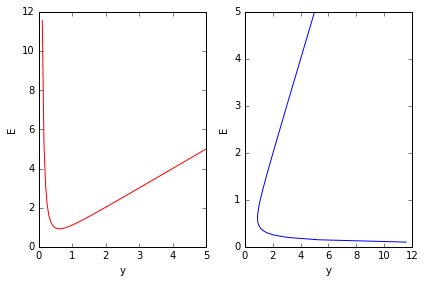

In [5]:
Q = 3 # Discharge 
g = 9.81 
b = 2 # width of the channel
q = Q/b 
y = np.linspace(0.1,5,100)

plt.subplot(1,2,1)
p1=plt.plot(y, y+(q**2/(2*g*y**2)), "r-") , plt.xlabel("y"), plt.ylabel("E")
plt.subplot(1,2,2)
p1=plt.plot(y+(q**2/(2*g*y**2)),y, "b-") , plt.xlabel("y"), plt.ylabel("E")
plt.tight_layout() 

You observe that:

1. For each $E$ there are two depths. These depths are called *alternate depths*.
2. At only one point there is a single depth, which is called critical depth, $y_c$, and the corresponding energy is minimum energy, $E_c$.



The key questions are:

1. what is the minimum energy?
2. What is the critical depth., i.e. the depth at minimum energy.

The answers are rather simple. For finding minimum energy $E_c$ all we need to do is take the first derivative with respect to $y$ of the *fundamental equation* and solve for $y$ by setting it equal to *zero*, i.e.,

Solve for $y$ for $\frac{dE}{dy} =0 $




In [9]:
y, g, q =sp.symbols("y g q")
E = y + (q**2/(2*g*y**2))
print("differentiating E with respect to y we get dE/dy =")
E_c = sp.diff(E,y); 
sp.pprint(E_c)
print("equating dE/dy = 0, we get the critical depth y")
y_c = sp.solve(E_c, y)
yc =y_c[0] 
print("yc = "); yc  

differentiating E with respect to y we get dE/dy =
      2 
     q  
1 - ────
       3
    g⋅y 
equating dE/dy = 0, we get the critical depth y
yc = 


     ____
    ╱  2 
   ╱  q  
3 ╱   ── 
╲╱    g  

For clarity we rename $y$ as $y_c$, thus we get: $y_c^3 = \frac{q^2}{g}$.
The subscript $c$ stands for _critical_

Critical depth is a function of discharge per width, $q$,  only, i.e. we will have a unique $y_c$ for each $q$

Substituting this in the _fundamental equation_, where we also replace $E$ with $E_c$ we get: 


In [10]:
yc = sp.symbols('yc')
h = yc**3==(q**2/(2*g))
Ec = yc + yc**3*(1/(2*yc**2))
print("Ec= "); Ec

Ec= 


3⋅yc
────
 2  

Probably now you are interested to see the effect of $q$ on the $E-y$ plot when of course $b$ is held fixed. You can do that by plotting several $E-y$ curves in a single plot.

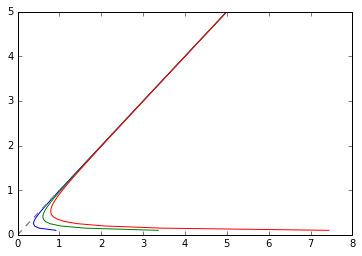

In [11]:
Q = np.array([2, 4 , 6]) # 3 discharges
b = 5 # fixed b
q = Q/b
g = 9.81
y = np.linspace(0.1,5,100)
p1 = plt.plot(y +q[0]**2/(2*g*y**2),y , y +q[1]**2/(2*g*y**2), y, y +q[2]**2/(2*g*y**2),y)  
plt.plot(((0,0), (1,1)), "--", color='grey')

We now solve an example problem taken from the course book. We solve **Example problem 2.1 (page # 46)**

_A 2.5 m wide rectangular channel has a specific energy of 1.50 when carrying a discharge of 6.48 m$^3$/s.
Calculate the alternate depths._

**Solution**:

The fundamental equation is: $ E = y + \frac{q^2}{2gy^2}$


We need to solve for y. The equation is non-linear
Known are E = 1.5, g = 9.81, b=2.5, Q = 6.48 and q = Q/b or q = 6.48/2.5
          0.342429357798165
1.5 = y + ─────────────────
                   2       
                  y        


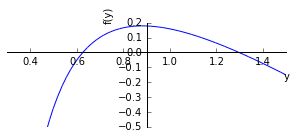

sol1 = 0.625288933447214
sol2 = 1.29655691384252


In [34]:
plt.rcParams["figure.figsize"] = (5,2)
y, E, g, Q, b, q = sp.symbols("y E g Q b q")
eq1 = sp.Eq(E, y+q**2/(2*g*y**2)) 
print("We need to solve for y. The equation is non-linear")
print("Known are E = 1.5, g = 9.81, b=2.5, Q = 6.48 and q = Q/b or q = 6.48/2.5")
eq2 = eq1.subs({E:1.5, g:9.81, q:6.48/2.5}); sp.pprint(eq2) ;
sp.plot(1.5-y-(0.342/y**2),(y, 0.3, 1.5), ylim=[-0.5, 0.25]) ;  
sol1 = sp.nsolve(1.5-y-(0.342/y**2), y, 0.5); print("sol1 =", sol1)
sol2 = sp.nsolve(1.5-y-(0.342/y**2), y, 1.4); print("sol2 =", sol2) 

OH! Did I miss it. Can I paste my images in the slide.

Surely- here it is: 

<center><img src="MUJLogo.png" width="400"></center>

[Manipal University Jaipur](https://www.jaipur.manipal.edu "Uni Homepage!")




Life is beautiful ENJOY
